##### Name  = Ila Deneshwara Sai
##### CWID  = A20562386
##### Email = dila@hawk.iit.edu

## Problem 1: Clustering

#### 1) Dataset lab04_dataset_1.csv have two variables x1 and x2. Apply KMeans algorithm on the two-dimensional data and output the resultng clusters using a scatterplot. You will apply KMeans over several clusters ranging from cluster-count K = 2 to 6. Make sure for every iteraton of different cluster-count, your scatterplot should use K colors to clearly distnguish the data points belonging in their respectve K clusters. Also, compute the SilhoueGe score for each of those K clusters and plot that score against K.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [3]:
data = pd.read_csv("lab04_dataset_1.csv")
data.head()

,x1,x2
0,1.102564,1.916789
1,1.142634,1.838410
2,1.294959,1.852666
3,1.431706,1.859261
4,1.461399,1.775216


In [4]:
def builtScatterPlot(minValue, maxValue, data) :

    silhouetteScoreDict = {}

    for i in range(minValue, (maxValue + 1)):
        kmeans = KMeans(n_clusters=i, random_state=50)
        kmeans.fit(data)
        labels = kmeans.predict(data)
        
        score = silhouette_score(data, kmeans.labels_)
        silhouetteScoreDict[i] = score

        plt.figure(figsize=(10,5))
        plt.subplot(1, len(range(5, 7)), 1)
        plt.scatter(data['x1'], data['x2'], c=kmeans.labels_, cmap='viridis')
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=150)
        plt.title("k = {}, silhouette Score : {:.2f}". format(i, score))

    return silhouetteScoreDict

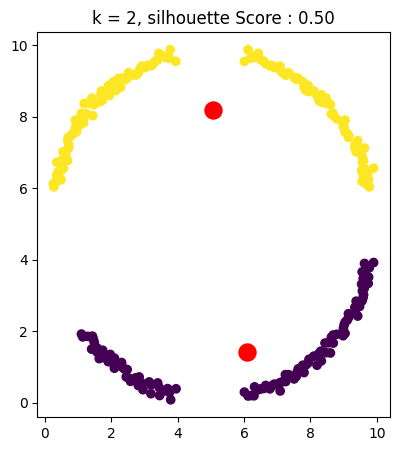

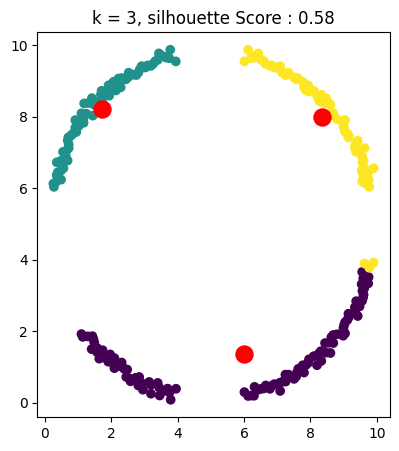

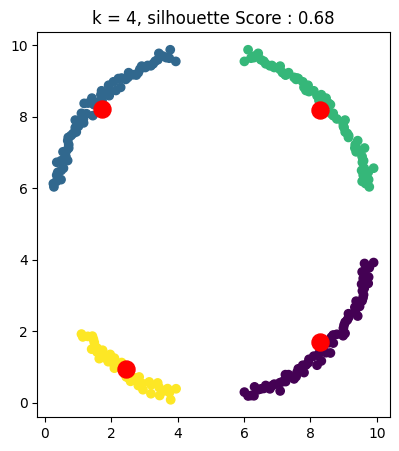

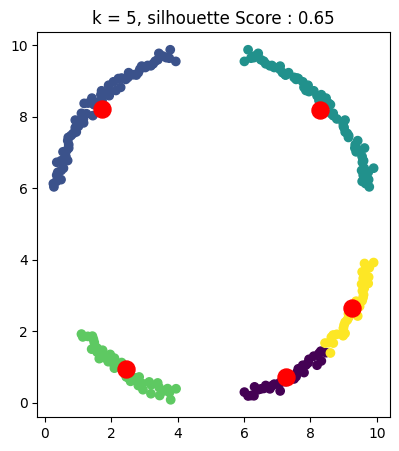

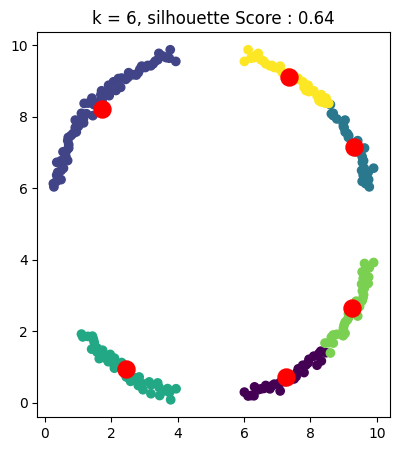

In [5]:
silhouetteScoreDict = builtScatterPlot(2, 6, data)

In [6]:
silhouetteScoreDict

{2: 0.49721305003469096,
 3: 0.5781924238958424,
 4: 0.6778975743295701,
 5: 0.6522565287710431,
 6: 0.6394875081002692}

In [7]:
def graphForSilhouetteScore(minValue, maxValue, silhouetteScoreDict):
    plt.figure(figsize=(10,5))
    plt.plot(silhouetteScoreDict.keys(), silhouetteScoreDict.values(), marker='o')
    plt.title("No of clusters k-value vs the respective silhouette Score")
    plt.xlabel('No of clusters k-value')
    plt.ylabel('The value of silhouette score')
    plt.xticks(range(minValue, (maxValue + 1)))
    plt.grid(True)

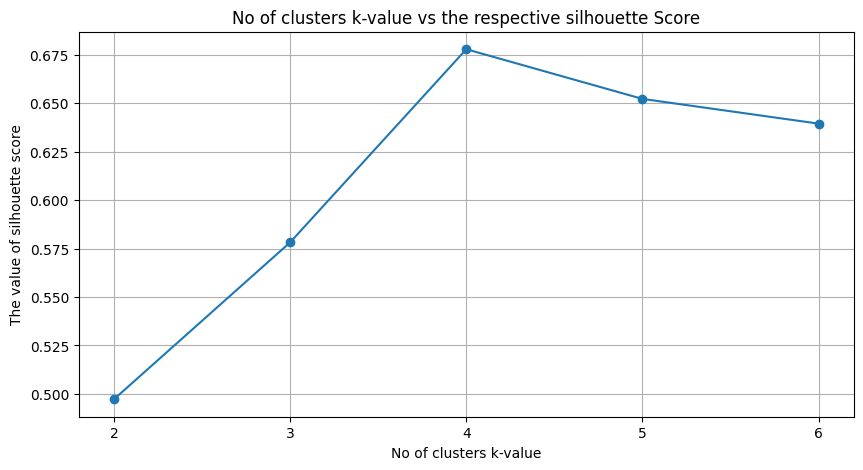

In [8]:
graphForSilhouetteScore(2, 6, silhouetteScoreDict)

#### 2) Dataset lab04_dataset_2.csv have two variables x1 and x2. Again, apply KMeans algorithm on the two-dimensional data with clusters ranging from K = 2 to 4 and output the resulting clusters using scatterplots. Do the cluster outputs you obtained using KMeans for this dataset make sense?

In [9]:
data1 = pd.read_csv('lab04_dataset_2.csv')
data1.head()

,ring,x1,x2
0,1,2.106861,-0.147326
1,2,3.408242,-0.238327
2,3,6.499233,-0.454471
3,4,9.701769,-0.678414
4,1,2.120919,-0.111153


{2: 0.2762083879143382, 3: 0.2899506638431938, 4: 0.30088171899686994}

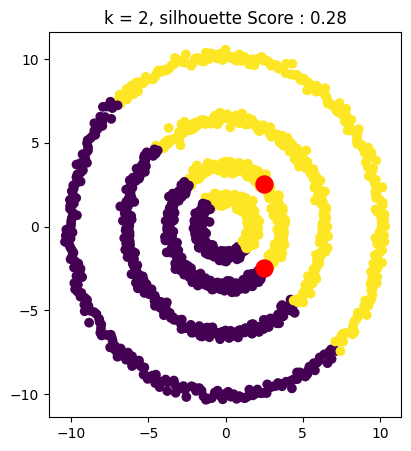

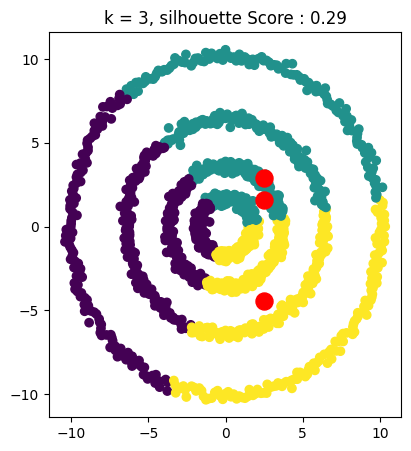

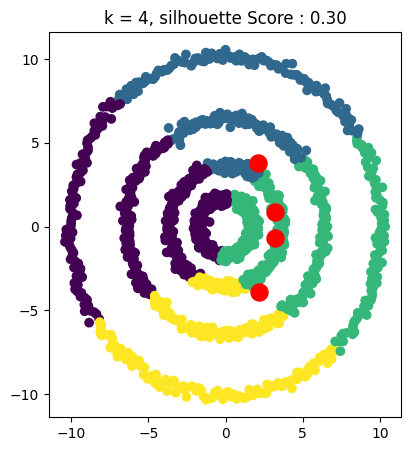

In [10]:
silhouetteScoreDict1 = builtScatterPlot(2, 4, data1)
silhouetteScoreDict1

#### The dataset lab04_dataset_1.csv has one ring with more than 1 cluster occupying the space in the scatterplot. but when it comes to lab04_dataset_2.csv, There are many rings inside a ring.

{2: 0.2762083879143382, 3: 0.2899506638431938, 4: 0.30088171899686994}

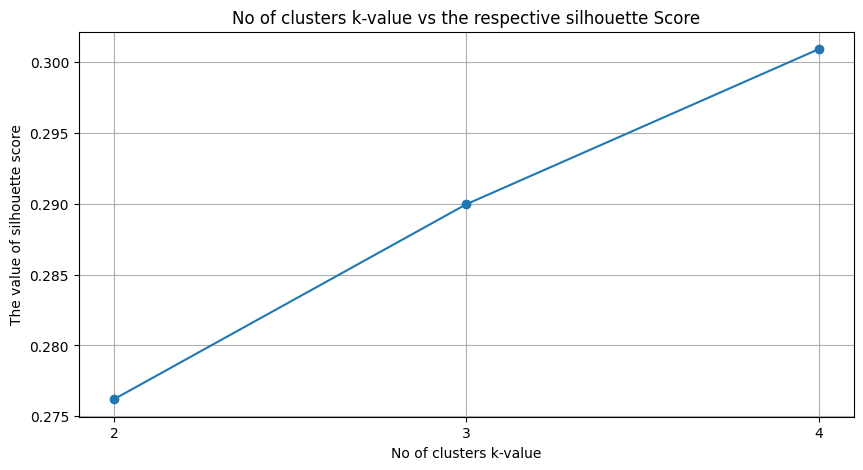

In [11]:
graphForSilhouetteScore(2, 4, silhouetteScoreDict1)
silhouetteScoreDict1

#### 3) The data in the lab04_dataset_2.csv forms 4 concentric rings rather than being well- separated clusters. So ideally, we would want 4 clusters representing the 4 concentric rings. KMeans is not well-suited to handle data like this. Use SpectralClustering to cluster the data. Show the results for clusters K = 2 to 4

In [12]:
data1 = pd.read_csv('lab04_dataset_2.csv')
data1.head()
minCluster = 2
maxCluster = 4

In [13]:
def buildSpectralClustering(minValue, maxValue, df):

    silhouetteScoreDict = {}

    plt.figure(figsize=(18, 5))
    
    for i in range(minValue, (maxValue + 1)):
        spectralClusturing = SpectralClustering(n_clusters=i, affinity='nearest_neighbors', random_state=50)
        y_pred = spectralClusturing.fit_predict(df)
        print(y_pred)

        plt.subplot(1, 5, i+1)
        plt.scatter(x=df['x1'], y=df['x2'], c=y_pred, cmap='viridis') 
        plt.title(f'Spectral Clustering when k = {i}')
        plt.legend()

        silhouetteScoreDict[i] = silhouette_score(df[['x1', 'x2']], y_pred)

    return silhouetteScoreDict

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1 0 0 ... 0 0 0]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1 0 2 ... 0 2 0]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1 2 3 ... 2 3 0]


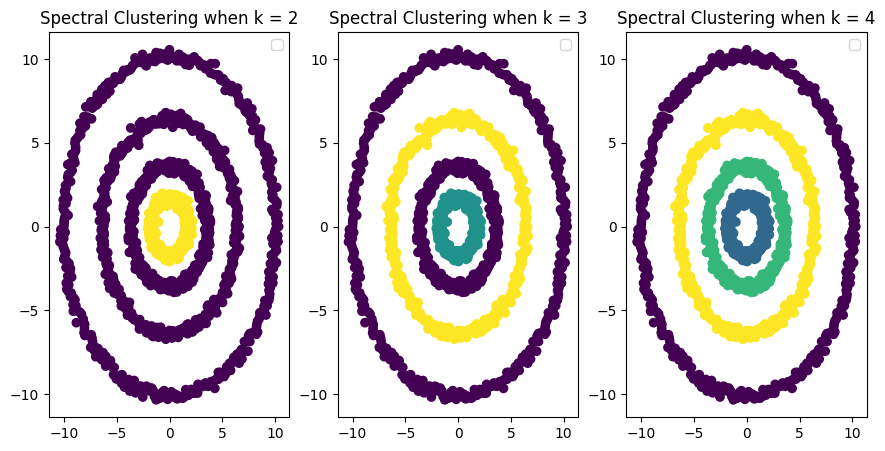

In [14]:
silhouetteScoreDict = buildSpectralClustering(minCluster, maxCluster, data1)

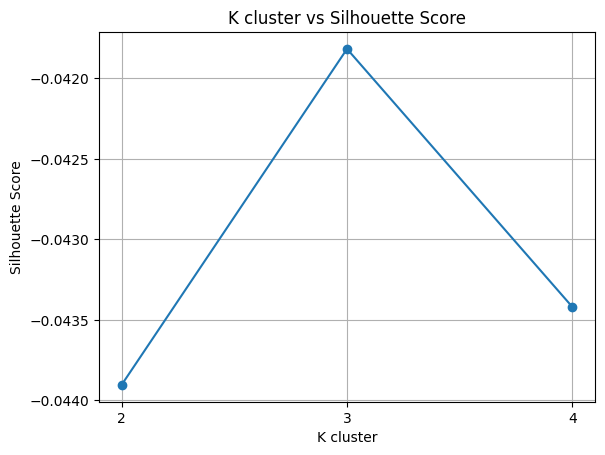

In [15]:
plt.tight_layout()
plt.plot(silhouetteScoreDict.keys(), silhouetteScoreDict.values(), marker='o')
plt.title("K cluster vs Silhouette Score")
plt.xlabel("K cluster")
plt.ylabel("Silhouette Score")
plt.xticks(range(minCluster, (maxCluster + 1)))
plt.grid(True)

#### 4) It is possible that SpectralClustering although an improvement over K-Means is still not able to create 4 clusters corresponding to the 4 concentric rings. Explore the other sklearn clustering algorithms to see which one can produce 4 clusters corresponding with the 4 concentric rings. Hint: I mentioned this algorithm during our class while discussing density-based clustering.

In [16]:
data2 = pd.read_csv('lab04_dataset_2.csv')
data2.head()
minCluster = 2
maxCluster = 4

In [17]:
def buildDBSCAN(minCluster, maxCluster, df):

    for i in range(minCluster, (maxCluster + 1)):
        dbScan = DBSCAN(eps=0.5, min_samples=i)
        labels = dbScan.fit_predict(data2)

        plt.figure(figsize=(4, 4))
        plt.scatter(df['x1'], df['x2'], c = labels, cmap='viridis')
        plt.title(f"Clustering using DBSCAN with min_samples = {i}")
        plt.xlabel("values of x1")
        plt.ylabel("values of x2")

        print(labels)
    pass

[0 1 2 ... 1 2 3]
[0 1 2 ... 1 2 3]
[0 1 2 ... 1 2 3]


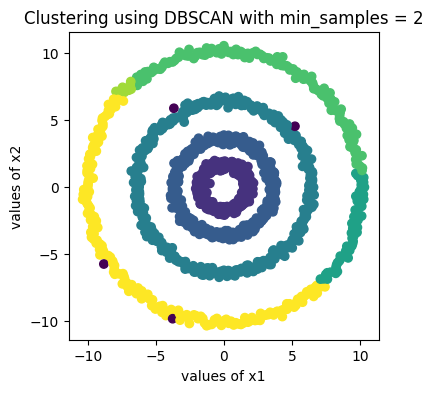

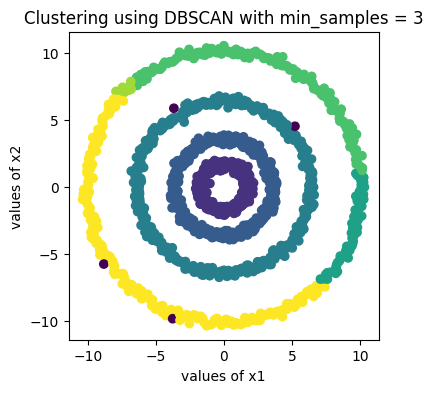

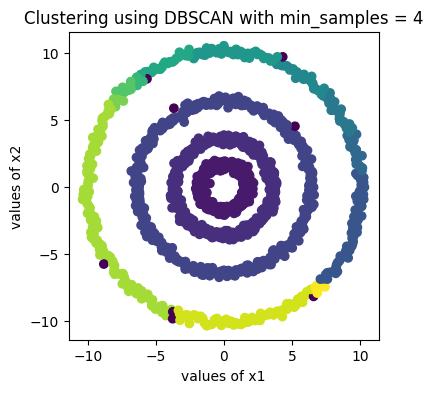

In [18]:
buildDBSCAN(minCluster, maxCluster, data2)

#### --------------------------------------------------------------------------------------------------------------------------------------

## Problem 2: Neural Network

#### You will train a Multi-Layer Perceptron neural network for the task of classification on the dataset lab04_dataset_3.csv using MLPClassifier. The inputs to your MLPClassifier are alcohol, citric_acid, free_sulfur_dioxide, residual_sugar, sulphates, while the output is quality_grp, which has two categories, namely, 0 and 1. Use a train-test split of 80-20. For the learning task, you will train neural network models with different architectures:
#### a. Activation function = [logistic, relu, tanh]
#### b. Hidden layers = [1, 2, 3, 4, 5]
#### c. Neurons per layer = [2, 4, 6, 8]
#### So, basically in the first iteration you will create a learning model using the neural network architecture [logistic, 1, 2], in the second iteration you will use [logistic, 1, 4], all the way to [tanh, 5, 8]. For each of these learned models, compute the Misclassification Rate on the test set. Once you are done with all the training, you should output a dataframe with columns Activation Function, Hidden layers, Neurons per layer, Misclassification Rate, where each row will correspond with the individual training models. Since the total count of activation functions, hidden layers and neurons are 3, 5, 4 respectively, the number of rows in your output dataframe should be 3 x 5 x 4 = 60. Also use max_iter=10000 and random_state=2023484 inside MLPClassifier definition

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pylab as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

In [20]:
data = pd.read_csv('lab04_dataset_3.csv')
print(data.shape)
data.head()

(6497, 14)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,quality_grp
0,7.4,0.20,0.43,7.80,0.045,27.0,153.0,0.99640,3.19,0.55,9.0,7,white,1
1,5.9,0.32,0.19,14.50,0.042,37.0,115.0,0.99684,3.16,0.43,10.3,5,white,0
2,6.8,0.37,0.28,1.90,0.024,64.0,106.0,0.98993,3.45,0.60,12.6,8,white,1
3,7.4,0.25,0.36,2.05,0.050,31.0,100.0,0.99200,3.19,0.44,10.8,6,white,0
4,6.1,0.68,0.52,1.40,0.037,32.0,123.0,0.99022,3.24,0.45,12.0,6,white,0


In [21]:
data.shape

(6497, 14)

In [22]:
X = data[['alcohol', 'citric_acid', 'free_sulfur_dioxide', 'residual_sugar', 'sulphates']] 
Y = data[['quality_grp']]
print(Y)
Y = Y.values.ravel()

      quality_grp
0               1
1               0
2               1
3               0
4               0
...           ...
6492            1
6493            0
6494            0
6495            0
6496            0

[6497 rows x 1 columns]


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=50)

In [24]:
activationFunction = ['logistic', 'relu', 'tanh']
hiddenLayers = [1, 2, 3, 4, 5]
neuronPerLayers = [2, 4, 6, 8]

In [25]:
def mlpClassifier(activation, layer, neuron, X_train, X_test, Y_train, Y_test):
    mlpClassifier = MLPClassifier(hidden_layer_sizes=tuple(neuron for _ in range(layer)),
                                  activation=activation, max_iter=10000, random_state=2023484)
    mlpClassifier.fit(X_train, Y_train)
    y_pred = mlpClassifier.predict(X_test)
    return y_pred

In [26]:
def builtMLPClassifier(): 
    output = []
    index = 0

    for activations in activationFunction:
        for layers in hiddenLayers:
            for neurons in neuronPerLayers:
                y_pred = mlpClassifier(activations, layers, neurons, X_train, X_test, Y_train, Y_test)
                misClassificationRate = 1 - accuracy_score(Y_test, y_pred)
                output.append([activations, layers, neurons, round(misClassificationRate, 6)])
                print(f'Index : {(index + 1)} -> {activations} {layers} {neurons} {round(misClassificationRate, 6)}')
                index+=1
                
    print(f"No of iterations = {index}")
    return output 

In [27]:
output = builtMLPClassifier()

Index : 1 -> logistic 1 2 0.186154
Index : 2 -> logistic 1 4 0.198462
Index : 3 -> logistic 1 6 0.198462
Index : 4 -> logistic 1 8 0.198462
Index : 5 -> logistic 2 2 0.183077
Index : 6 -> logistic 2 4 0.198462
Index : 7 -> logistic 2 6 0.198462
Index : 8 -> logistic 2 8 0.176923
Index : 9 -> logistic 3 2 0.198462
Index : 10 -> logistic 3 4 0.198462
Index : 11 -> logistic 3 6 0.198462
Index : 12 -> logistic 3 8 0.198462
Index : 13 -> logistic 4 2 0.198462
Index : 14 -> logistic 4 4 0.198462
Index : 15 -> logistic 4 6 0.198462
Index : 16 -> logistic 4 8 0.198462
Index : 17 -> logistic 5 2 0.198462
Index : 18 -> logistic 5 4 0.198462
Index : 19 -> logistic 5 6 0.198462
Index : 20 -> logistic 5 8 0.198462
Index : 21 -> relu 1 2 0.198462
Index : 22 -> relu 1 4 0.180769
Index : 23 -> relu 1 6 0.179231
Index : 24 -> relu 1 8 0.180769
Index : 25 -> relu 2 2 0.198462
Index : 26 -> relu 2 4 0.184615
Index : 27 -> relu 2 6 0.187692
Index : 28 -> relu 2 8 0.185385
Index : 29 -> relu 3 2 0.198462
I

In [28]:
outputDF = pd.DataFrame(output, columns=['Activation_Function', 'Hidden_Layers', 'Neuron_per_Layers', 'MisClassificationRate'])
print(outputDF.shape)
outputDF.head()

(60, 4)


,Activation_Function,Hidden_Layers,Neuron_per_Layers,MisClassificationRate
0,logistic,1,2,0.186154
1,logistic,1,4,0.198462
2,logistic,1,6,0.198462
3,logistic,1,8,0.198462
4,logistic,2,2,0.183077


#### 2) Create a scatterplot of the Misclassification Rate, make sure that the misclassifiction rates are distinguishable by different colors according to their activation function. So, the scatterplot should have 3 colors differentiating the misclassification rates associated with the 3 activation functions. 

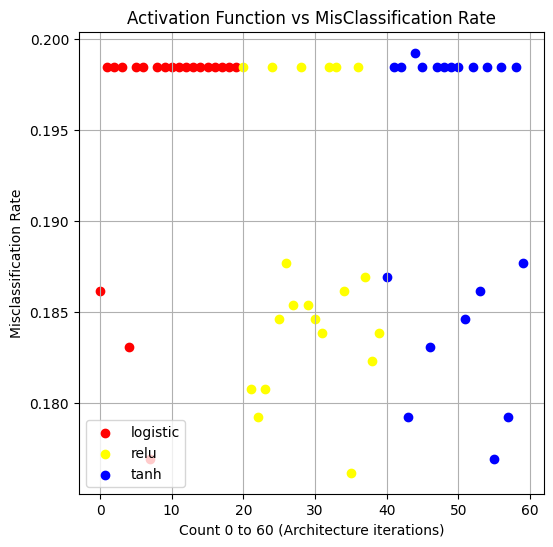

In [29]:
activationColors = {'logistic':'red' , 'relu': 'yellow', 'tanh': 'blue'}

plt.figure(figsize=(6, 6))

for items in activationFunction:
    activationData = outputDF[outputDF['Activation_Function'] == items]
    plt.scatter(activationData.index, activationData['MisClassificationRate'], color=activationColors[items], label=items)

plt.title('Activation Function vs MisClassification Rate')
plt.xlabel('Count 0 to 60 (Architecture iterations)')
plt.ylabel('Misclassification Rate')
plt.grid(True)
plt.legend()

#### 3) The model with the lowest Misclassification Rate is the best neural network. Output the model parameters (activation function, hidden layers, neurons) of this neural network. In the case of ties, choose the network with fewer neurons overall.

In [30]:
sortedOutputDf = outputDF.sort_values(by=['MisClassificationRate', 'Neuron_per_Layers'], ascending=[True, True])
sortedOutputDf.head()

,Activation_Function,Hidden_Layers,Neuron_per_Layers,MisClassificationRate
35,relu,4,8,0.176154
7,logistic,2,8,0.176923
55,tanh,4,8,0.176923
57,tanh,5,4,0.179231
22,relu,1,6,0.179231


In [31]:
bestParameters = sortedOutputDf.iloc[0]
print(f'The best model paameters :\n Activation Function : {bestParameters['Activation_Function']} \n Hidden layers : {bestParameters['Hidden_Layers']} \n Neuron per layers : {bestParameters['Neuron_per_Layers']}')

The best model paameters :
 Activation Function : relu 
 Hidden layers : 4 
 Neuron per layers : 8


--------------------------------------------------------------------------------------------


#### 4) You will train a Multi-Layer Perceptron neural network for the task of regression on the dataset lab04_dataset_4.csv using MLPRegressor. The inputs to your MLPRegressor are housing_median_age, total_rooms, households, median_income and the output is median_house_value. First, normalize the dataset, and then create an 80-20 train-test split. In a similar manner to the previous classification task, you will once again learn multiple neural network models of varying architectures.
#### a. Activation function = [relu, tanh]
#### b. Hidden layers = [2, 3, 4]
#### c. Neurons per layer = [4, 6, 8]
#### For each of these learned models, compute the Root Mean Square Error. Once you are done with all the training, you should output a dataframe with columns Activation function, Hidden layers, Neurons per layer, Root Mean Square Error, where each row will correspond with the individual training models. Since the total count of activation functions, hidden layers and neurons are 2, 3, 3 respectively, the number of rows in your output dataframe should be 2 x 3 x 3 = 18. Also use random_state=2023484 inside MLPRegressor definition 

In [32]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

data = pd.read_csv('lab04_dataset_4.csv')
print(data.shape)
data.head()

(17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [33]:
X = data[['housing_median_age', 'total_rooms', 'households', 'median_income']]
Y = data[['median_house_value']]
X.head()

,housing_median_age,total_rooms,households,median_income
0,15.0,5612.0,472.0,1.4936
1,19.0,7650.0,463.0,1.8200
2,17.0,720.0,117.0,1.6509
3,14.0,1501.0,226.0,3.1917
4,20.0,1454.0,262.0,1.9250


In [34]:
# normalizing the input
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)
Y = Y.values.ravel()
print(X_Scaled)
print(Y)

[[-1.07967114  1.36169494 -0.07599796 -1.25254316]
 [-0.76187201  2.29660752 -0.09940441 -1.08148298]
 [-0.92077158 -0.88246225 -0.99925206 -1.17010515]
 ...
 [-0.92077158  0.01529238 -0.11760942 -0.44666313]
 [-0.76187201  0.01299867 -0.06039367 -0.99778717]
 [ 1.85997083 -0.377848   -0.60134255 -0.45536288]]
[ 66900.  80100.  85700. ... 103600.  85800.  94600.]


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X_Scaled, Y, test_size=0.2, random_state=2023484)
X_train

array([[ 0.5887743 ,  0.25704847, -0.00577864,  0.8811496 ],
       [-1.47692006,  0.34879652,  0.45194734, -1.14557814],
       [-1.15912093, -0.42051084, -0.5935404 ,  0.76475111],
       ...,
       [ 0.42987474, -0.9526495 , -0.94463703, -1.09296036],
       [ 1.14492278, -0.82695468, -0.76518764, -0.45368582],
       [-1.39747028,  0.18410878,  0.03843353,  0.81239012]])

In [36]:
activationFunction = ['relu', 'tanh']
hiddenLayers = [2, 3, 4]
neuronPerLayers = [4, 6, 8]

In [37]:
def mlpRegression(activation, layer, neuron):
    hiddenLayerSizes = tuple([neuron] * layer)
    mlpRegressor = MLPRegressor(hidden_layer_sizes=hiddenLayerSizes, activation=activation, random_state=2023484)
    mlpRegressor.fit(X_train, Y_train)
    y_pred = mlpRegressor.predict(X_test)
    return y_pred

def buildMLPRegressor():

    index = 0
    output = []

    for activation in activationFunction:
        for layers in hiddenLayers:
            for neurons in neuronPerLayers:
                y_pred = mlpRegression(activation, layers, neurons)
                rootMeanSquareError = np.sqrt(mean_squared_error(Y_test, y_pred))
                print('Index : ', (index + 1) , ' -> ' , activation, ' ' , layers, ' ' , neurons, ' ', round(rootMeanSquareError, 6))
                output.append([activation, layers, neurons, round(rootMeanSquareError, 6)])

                index+=1
    
    return output

In [38]:
output = buildMLPRegressor()

Index :  1  ->  relu   2   4   131753.633576
Index :  2  ->  relu   2   6   129095.761982
Index :  3  ->  relu   2   8   94899.854746
Index :  4  ->  relu   3   4   76907.800011
Index :  5  ->  relu   3   6   76133.232229
Index :  6  ->  relu   3   8   75813.298306
Index :  7  ->  relu   4   4   76207.341592
Index :  8  ->  relu   4   6   75870.719293
Index :  9  ->  relu   4   8   75627.43295
Index :  10  ->  tanh   2   4   238533.291183
Index :  11  ->  tanh   2   6   238508.478363
Index :  12  ->  tanh   2   8   238484.549578
Index :  13  ->  tanh   3   4   238532.553505
Index :  14  ->  tanh   3   6   238509.608371
Index :  15  ->  tanh   3   8   238485.483314
Index :  16  ->  tanh   4   4   238533.18736
Index :  17  ->  tanh   4   6   238510.899423
Index :  18  ->  tanh   4   8   238483.959096


In [40]:
outputDF = pd.DataFrame(output, columns=['Activation_Function', 'Hidden_Layers', 'Neurons_Per_Layers', 'Root_Mean_Square_Error'])
outputDF.head()

,Activation_Function,Hidden_Layers,Neurons_Per_Layers,Root_Mean_Square_Error
0,relu,2,4,131753.633576
1,relu,2,6,129095.761982
2,relu,2,8,94899.854746
3,relu,3,4,76907.800011
4,relu,3,6,76133.232229


#### 5) Create a scatterplot of the Root Mean Square Error, make sure that the root mean square errors are distinguishable by different colors according to their activation function. So, the scatterplot should have 2 colors differentiating the root mean square errors associated with the 2 activation functions.

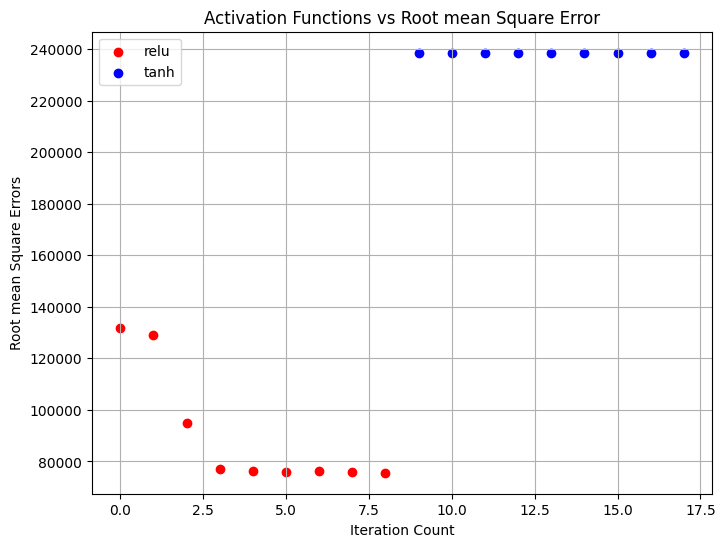

In [41]:
activationColors = {'relu': 'red', 'tanh': 'blue'}
plt.figure(figsize=(8, 6))
for items in activationFunction:
    result = outputDF[outputDF['Activation_Function'] == items]
    plt.scatter(result.index, result['Root_Mean_Square_Error'], color=activationColors[items], label=items)

plt.title("Activation Functions vs Root mean Square Error")
plt.xlabel('Iteration Count')
plt.ylabel('Root mean Square Errors')
plt.legend()
plt.grid(True)

#### 6) The model with the lowest Root Mean Square Error is the best neural network. Output the model parameters (activation function, hidden layers, neurons) of this neural network. In the case of ties, choose the network with fewer neurons overall. 

In [42]:
sortedOutputDf = outputDF.sort_values(by=['Root_Mean_Square_Error', 'Neurons_Per_Layers'], ascending=[True, True])
bestModel = sortedOutputDf.iloc[0]
sortedOutputDf.head()

,Activation_Function,Hidden_Layers,Neurons_Per_Layers,Root_Mean_Square_Error
8,relu,4,8,75627.432950
5,relu,3,8,75813.298306
7,relu,4,6,75870.719293
4,relu,3,6,76133.232229
6,relu,4,4,76207.341592


In [43]:
print("The best architecture is")
print(f"Activation Function : {bestModel['Activation_Function']}")
print(f"Hidden Layers : {bestModel['Hidden_Layers']}")
print(f"Neurons per layer : {bestModel['Neurons_Per_Layers']}")
print(f"Root Mean Square Error : {bestModel['Root_Mean_Square_Error']}")

The best architecture is
Activation Function : relu
Hidden Layers : 4
Neurons per layer : 8
Root Mean Square Error : 75627.43295
